<a href="https://colab.research.google.com/github/YoussraSaadeddine/github-example/blob/master/stage_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flowers Recognition by CNN Architecture**

## Introduction
**********************************

#####Dans ce projet, nous allons résoudre un problème de classification d'image, où notre objectif sera de dire à quelle classe appartient l'image d'entrée. La façon dont nous allons y parvenir est de former un réseau de neurones artificiels sur quelques milliers d'images de fleurs et de faire apprendre au NN (Neural Network) à prédire à quelle classe l'image appartient.
#####Dans ce projet, nous allons utiliser  Keras deep learning library en python pour construire notre CNN (Convolutional Neural Network).

## table de matiére
************************************************************


1.   Importing libraries and modules,
2.   Load data,
3.   Preparing Data,
4.   Define model architecture,
5.   Compile model,
6.   Fit model on training data,
7.   Evaluate model 
8.   Predict values.








## 1. Importing libraries and modules.
**********************************************

- Importons d'abord tous les paquets keras requis avec lesquels nous allons construire notre CNN 
- il y a deux manières d'utilisation de keras, (1) en utilisant le backend Tensorflow et (2) en utilisant le backend Theano ici, nous utiliserons le backend tensorflow

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#deep learning libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

# specifically for manipulating images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Voyons maintenant pourquoi des packages ci-dessus est importé:**
********************************************

- nous avons importé Sequential from keras.models, pour initialiser notre modèle de réseau neuronal en tant que réseau séquentiel. Il existe deux méthodes de base pour initialiser un réseau de neurones, soit par une séquence de layers, soit sous forme de graphique.
- nous avons importé Conv2D from keras.layers, c'est pour effectuer l'opération de convolution, c'est-à-dire la première étape d'un CNN, sur les images d'entraînement. Puisque nous travaillons ici sur des images , qui sont essentiellement des tableaux à 2 dimensions.
- nous avons importé MaxPooling2D from keras.layers, qui est utilisé pour l'opération de mise en commun, c'est-à-dire l'étape 2 du processus de création d'un CNN. Pour construire ce réseau de neurones particulier, nous utilisons une fonction Max pooling, il existe différents types d'opérations de pooling comme Min Pooling, Avg Pooling, etc. Ici, dans MaxPooling, nous avons besoin du pixel de valeur maximale de la région d'intérêt respective.
- nous avons importé Flatten from keras.layers, qui est utilisé pour Flattening. c'est le processus de conversion de tous les tableaux bidimensionnels résultants en un seul vecteur linéaire long et continu.
- nous avons importé Dense from keras.layers, qui est utilisé pour effectuer la connexion complète du réseau neuronal, qui est l'étape 4 dans le processus de création d'un CNN.

##  2. Load Data
**************************************

**Présentation du DATASET**
*************************************************

Cette DATASET contient 4242 images de fleurs.
La collecte de données est basée sur les données flicr, google images, images yandex.Vous pouvez utiliser cette banque de données pour reconnaître les plantes de la photo.Les images sont divisées en cinq classes: chamomile, tulip, rose, sunflower, dandelion. Pour chaque classe, il y a environ 800 photos. Les photos ne sont pas en haute résolution, environ 320x240 pixels. Les photos ne sont pas réduites à une seule taille, elles ont des proportions différentes


source: [cliquez ici](https://www.kaggle.com/alxmamaev/flowers-recognition)

####**Importing files from Google Drive in Colab**
*******************************************************
notre dataset est stockée dans Google Drive donc nous avons besoin de 
lier notre compte Google Drive avec notre notebook.
1. La première étape consiste à monter notre Google Drive en exécutant le code en dessous.
2.  nous obtenons le code d'autorisation en nous connectant à notre compte Google.
3.   nous collons le code d'autorisation et nous appuyons sur Entrée.


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#### Get the train and test set from the Images
*********************************************************

In [3]:
X=[]
labels=[]
IMG_SIZE=150
DAISY_PATH=r'/gdrive/My Drive/flowers/daisy'
SUNFLOWER_PATH=r'/gdrive/My Drive/flowers/sunflower'
TULIP_PATH=r'/gdrive/My Drive/flowers/tulip'
ROSE_PATH=r'/gdrive/My Drive/flowers/rose'
DANDI_PATH=r'/gdrive/My Drive/flowers/dandelion'

**Fonctions**

In [4]:
def retourne_label(img,flower_type):
    return flower_type
    

In [5]:
def get_train_data(flower_type,PATH):
    for img in tqdm(os.listdir(PATH)):
        label=retourne_label(img,flower_type)
        path = os.path.join(PATH,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        labels.append(str(label))
        
        
        

In [ ]:
Paths=[SUNFLOWER_PATH,TULIP_PATH,ROSE_PATH,DAISY_PATH,DANDI_PATH]
flowers=['Sunflower','Tulip','rose','daisy','dandelion']
for i,j in zip(flowers,Paths):
  get_train_data(i,j)

In [7]:
print(len(X))
print(len(labels))
# pour chaque image on a un label

4492
4492


**Voyons 4 images aléatoirement**
************************************************

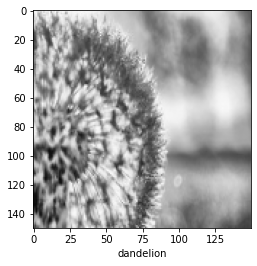

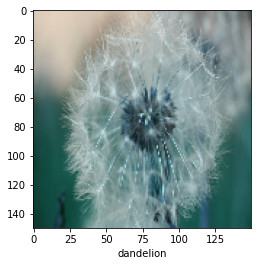

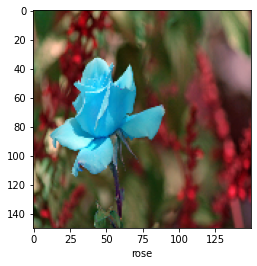

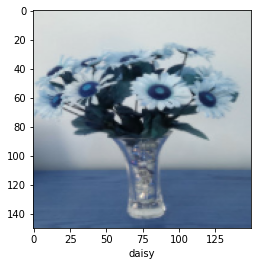

In [8]:
for j in range(4):
    i=np.random.randint(len(X))
    plt.imshow(X[i])
    plt.xlabel(labels[i])
    plt.show()

## 3. Preparing Data
************************************

##### LabelEncoder est une classe utilitaire pour aider à normaliser les labels de sorte qu'elles ne contiennent que des valeurs comprises entre 0 et n_classes-1.
##### nous avons utilisez fit_transform pour donner à chaque label un valeur numérique simultanément avec le fitting


In [ ]:

"""                                                Example
>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1])
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']
""" 

In [9]:
le = LabelEncoder()
Y = le.fit_transform(labels)
Y = to_categorical(Y,5,int)
X=np.array(X)
X=X/255

**Splitting Data**
*******************************************

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)



##  4. Define model architecture
***************************************************

**Le processus de construction d'un CNN implique toujours quatre étapes majeures:**
- Convolution:
Nous avons pris l'objet qui a déjà une idée de la façon dont notre réseau de neurones va être (Séquentiel), puis nous avons ajouté une couche de convolution en utilisant la fonction «Conv2D». La fonction Conv2D prend 4 arguments, le premier est le nombre de filtres soit 64 ici, le deuxième argument est la forme que chaque filtre va être soit 3x3 ici, le troisième est la forme d'entrée et le type d'image (RGB ou Noir et blanc) de chaque image, c'est-à-dire que l'image d'entrée que notre CNN va prendre est d'une résolution de 150x150 et «3» signifie RGB, qui est une couleur img, le quatrième argument est la fonction d'activation que nous voulons utiliser, ici c'est 'relu'.
- Pooling:
L'objectif principal d'une opération de poooling est de réduire au maximum la taille des images.
- Flattening:
c'est le faite de prendre le tableau 2-D, c'est-à-dire des pixels d'image regroupés et de les convertir en un vecteur unidimensionnel unique.
- Full connection:
Dans cette étape, nous devons créer une couche entièrement connectée, et à cette couche, nous allons connecter l'ensemble de nœuds que nous avons obtenus après l'étape flattening, ces nœuds agiront comme une couche d'entrée pour ces couches entièrement connectées.


In [11]:
#  modelling CNN Architecture

model = Sequential()
#convolution 1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(Dropout(0.20))
#convolution 2nd layer
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.20))
#convolution 3rd layer
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))
#convolution 4rd layer
model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))
#convolution 4rd layer
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))
#convolution 5rd layer
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.20))


#Fully connected layer 1
model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))
#Fully connected layer 2
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))
#Fully connected layer 3
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))
#Fully connected final layer
model.add(Dense(5, activation = "softmax"))

##  LR Annealer
**************************************

##### Les modèles bénéficient souvent de réduire le taux d'apprentissage par un facteur de 2-10 fois d'apprentissage stagner. Ce rappel surveille une quantité et si aucune amélioration est observée pour un certain nombre de « patience » des époques, le taux d'apprentissage est réduite.
- monitor	c'est la quantité à surveiller.
- patience c'est le	nombre d'époques sans amélioration après quoi le taux d'apprentissage sera réduit.
- verbose	a 2 valeurs-> 0: calme, 1: messages de mise à jour.
- factor c'est le facteur par lequel le taux d'apprentissage sera réduit. new_lr = lr * factor .
- min_lr c'est la	borne inférieure sur le taux d'apprentissage.

In [12]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.6, min_lr=0.000001)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 128)     5

### data augmentation 
*******************************************

##### L'augmentation des données est le processus d'augmentation de la quantité et de la diversité des données. Nous ne collectons pas de nouvelles données, nous transformons plutôt les données déjà présentes.
##### nous avons besoin de grandes quantités de données et dans certains cas, il n'est pas possible de collecter des milliers ou des millions d'images, donc l'augmentation des données vient à la rescousse.
##### Cela nous aide à augmenter la taille de l'ensemble de données et à introduire de la variabilité dans l'ensemble de données.
#####Les opérations les plus couramment utilisées sont:
- Rotation
- Shearing
- Zooming
- Cropping
- Flipping
- Changing the brightness level

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## 5. Compile model
**********************************************

##### Maintenant que nous avons terminé la création de notre modèle CNN, il est temps de le compiler.

In [15]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

##  6 . Fit model on training data
**********************************************

- steps_per_epoch contient le nombre d'images d'entraînement, c'est-à-dire le nombre d'images que contient le training_set.
- Epoch, Une Epoch est quand un ensemble de données ENTIER est passé en forward et en backward à travers le réseau neuronal seulement UNE FOIS.
- size batch c'est le nombre total du training examples present dans un  single batch.

In [16]:
batch_size=64
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 140, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/140
56/56 [==============================] - 19s 347ms/step - loss: 1.5689 - accuracy: 0.3766 - val_loss: 2.5416 - val_accuracy: 0.1980
Epoch 2/140
56/56 [==============================] - 18s 327ms/step - loss: 1.3456 - accuracy: 0.4916 - val_loss: 2.2707 - val_accuracy: 0.1980
Epoch 3/140
56/56 [==============================] - 18s 327ms/step - loss: 1.2531 - accuracy: 0.5120 - val_loss: 3.0065 - val_accuracy: 0.1980
Epoch 4/140
56/56 [==============================] - 18s 328ms/step - loss: 1.1558 - accuracy: 0.5463 - val_loss: 3.6817 - val_accuracy: 0.1980
Epoch 5/140
56/56 [==============================] - 18s 328ms/step - loss: 1.0765 - accuracy: 0.5837 - val_loss: 2.9822 - val_accuracy: 0.1980
Epoch 6/140
56/56 [==============================] - 18s 327ms/step - loss: 1.0414 - accuracy: 0.5931 - val_loss: 2.7822 - val_accuracy: 0.1980
Epoch 7/140
56/56 [==============================] - 18s 330


## 7. L'évaluation du model
*************************************

**Les valeurs du loss et accuracy**
******************************************

In [17]:
#train set
print("TRAIN SET:")
print("Loss du model est: " , model.evaluate(x_train,y_train)[0])
print("L'Accuracy du model est: " , model.evaluate(x_train,y_train)[1]*100 , "%")
# test set
print("TEST SET:")
print("Loss du model est: " , model.evaluate(x_test,y_test)[0])
print("L'Accuracy du model est: " , model.evaluate(x_test,y_test)[1]*100 , "%")

TRAIN SET:
113/113 [==============================] - 5s 44ms/step - loss: 0.0554 - accuracy: 0.9797
Loss du model est:  0.05539238825440407
113/113 [==============================] - 5s 44ms/step - loss: 0.0554 - accuracy: 0.9797
L'Accuracy du model est:  97.96827435493469 %
TEST SET:
29/29 [==============================] - 1s 42ms/step - loss: 0.6492 - accuracy: 0.8532
Loss du model est:  0.6492093205451965
29/29 [==============================] - 1s 42ms/step - loss: 0.6492 - accuracy: 0.8532
L'Accuracy du model est:  85.31702160835266 %


**Visualisation** 
*********************************************

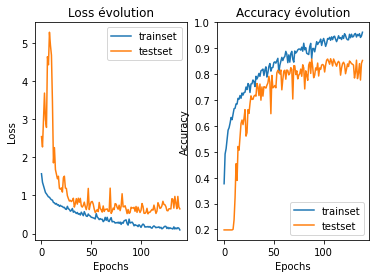

In [18]:
fig , ax = plt.subplots(1,2)
# 1 ere figure
ax[0].plot(History.history['loss'])
ax[0].plot(History.history['val_loss'])
ax[0].set_title('Loss évolution')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend(['trainset', 'testset'])


# 2 eme figure
ax[1].plot(History.history['accuracy'])
ax[1].plot(History.history['val_accuracy'])
ax[1].set_title('Accuracy évolution')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
plt.legend(['trainset', 'testset'])
# afficher les 2 figures
plt.show()


## 8 . Predict values

**Confusion matrix**
******************************************

#### Une matrice de confusion est un tableau qui est souvent utilisé pour décrire les performances d'un modèle de classification sur un ensemble de test set dont les vraies valeurs sont connues.

In [19]:
predi=model.predict(x_test)
predin=np.argmax(predi,axis=1)
y_t=np.argmax(y_test,axis=1)


In [20]:
cm=confusion_matrix(le.inverse_transform(y_t),le.inverse_transform(predin))

In [21]:
CM=pd.DataFrame(cm)

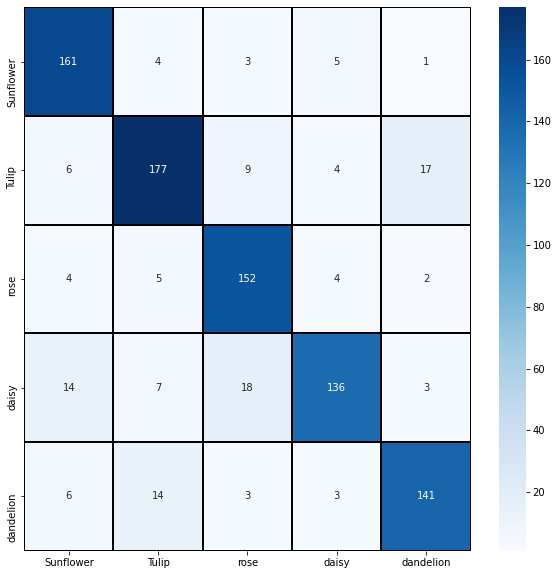

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = flowers , yticklabels = flowers)

**Testons le model sur autres images**

In [24]:
from keras.preprocessing import image
test_image=image.load_img('/gdrive/My Drive/flowers/sun.jpg',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pred=model.predict(test_image)

In [25]:
#flowers=['Sunflower','Tulip','daisy','rose','dandelion']
if pred[0][0]==0:
  print('sunflower')
elif pred[0][0]==1:
  print('tulip')
elif pred[0][0]==2:
  print('daisy')
elif pred[0][0]==3:
  print('rose')
else:
  print('dandelion')

sunflower
